In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras import Input

from functions import *

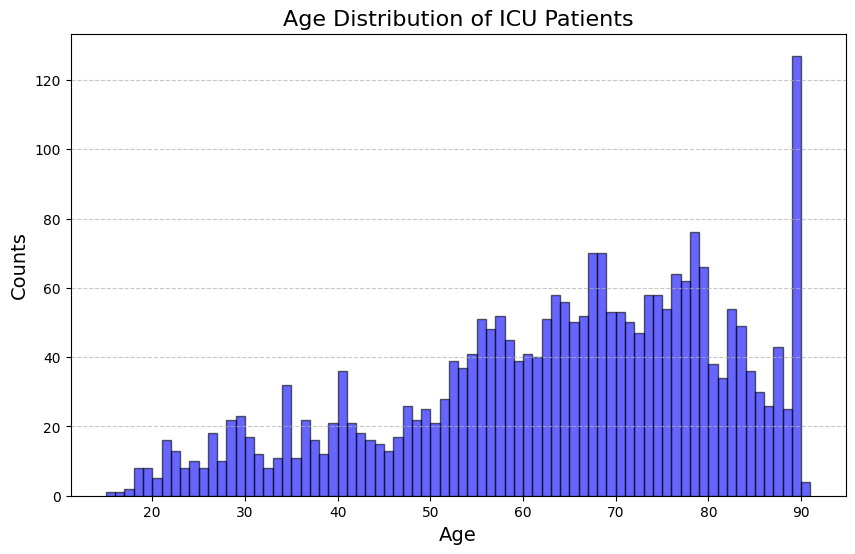

In [18]:
ages = np.load("eICU_age.npy").astype(float)
min_age, max_age = np.min(ages), np.max(ages)
#counts = Counter(ages) # useful check, usually on overflow bin

binning = np.arange(min_age, max_age+2,1)  #plots the 4 patients aged 90.0

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(ages, bins=binning, density=False, alpha=0.6, color='blue', edgecolor='black')
plt.title('Age Distribution of ICU Patients', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [3]:
min_age = np.min(ages)
max_age = np.max(ages)
ages_normed = (ages - min_age) / (max_age - min_age)

In [9]:
# Latent space dimension
latent_dim = 100

# Generator
generator = build_generator(latent_dim)

# Discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=optimizers.legacy.Adam(0.00002, 0.5),
                      metrics=['accuracy'])

# GAN model
gan_input = Input(shape=(latent_dim,))
fake_age = generator(gan_input)
discriminator.trainable = False
gan_output = discriminator(fake_age)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizers.legacy.Adam(0.0002, 0.5))

In [10]:
# Parameters
epochs = 3500
batch_size = 128  #tried smaller batch size, loss was too noisy

# Start training

d_loss, g_loss = train_gan(generator, discriminator, gan, ages_normed, epochs, batch_size, latent_dim)

Epoch: 0 [D loss: 0.6846938133239746] [G loss: 0.7275755405426025]
Epoch: 100 [D loss: 0.6855842471122742] [G loss: 0.6867305040359497]
Epoch: 200 [D loss: 0.6916863918304443] [G loss: 0.6690459847450256]
Epoch: 300 [D loss: 0.6886273622512817] [G loss: 0.6944829225540161]
Epoch: 400 [D loss: 0.6894220113754272] [G loss: 0.6854658126831055]
Epoch: 500 [D loss: 0.6903599500656128] [G loss: 0.6698813438415527]
Epoch: 600 [D loss: 0.6901222467422485] [G loss: 0.6617674827575684]
Epoch: 700 [D loss: 0.6899430155754089] [G loss: 0.6570619940757751]
Epoch: 800 [D loss: 0.6906639337539673] [G loss: 0.650517463684082]
Epoch: 900 [D loss: 0.6906619071960449] [G loss: 0.6516119241714478]
Epoch: 1000 [D loss: 0.69137042760849] [G loss: 0.6470385789871216]
Epoch: 1100 [D loss: 0.6914386749267578] [G loss: 0.6470652222633362]
Epoch: 1200 [D loss: 0.6920311450958252] [G loss: 0.6467432975769043]
Epoch: 1300 [D loss: 0.6919890642166138] [G loss: 0.6487696170806885]
Epoch: 1400 [D loss: 0.691752433776

32/32 [==============================] - 0s 418us/step


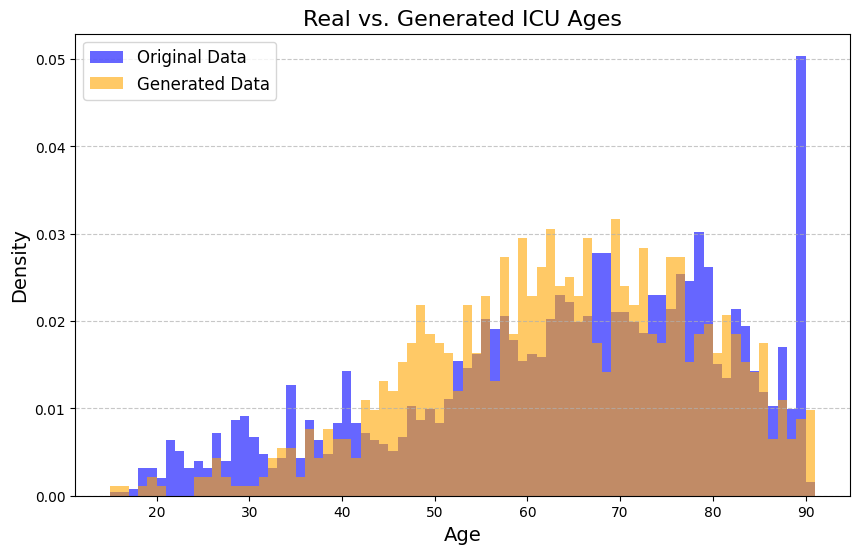

In [15]:
num_samples = 1000

# Generate noise for the generator
random_input = np.random.normal(0, 1, (num_samples, latent_dim))
generated_ages = generator.predict(random_input)

# Denormalize generated ages back to the original scale
generated_ages = generated_ages * (max_age - min_age) + min_age

# Plot the original and generated age distributions
plt.figure(figsize=(10, 6))
bins = np.arange(min_age, max_age + 2, 1)  # 1-year bin size
plt.hist(ages, bins=bins, density=True, alpha=0.6, label='Original Data', color='blue')
plt.hist(generated_ages, bins=bins, density=True, alpha=0.6, label='Generated Data', color='orange')

plt.title('Real vs. Generated ICU Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

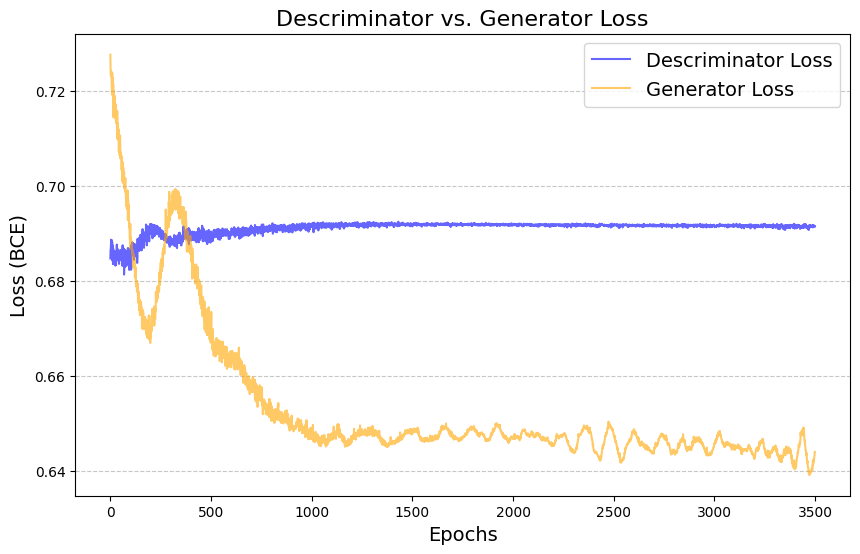

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(d_loss, label = 'Descriminator Loss',alpha=0.6, color='blue')
plt.plot(g_loss, label = 'Generator Loss',alpha=0.6,color='orange')
plt.title('Descriminator vs. Generator Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss (BCE)', fontsize=14)
plt.legend(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()